In [36]:
import pandas as pd
import numpy as np
import sys
%load_ext rpy2.ipython
%load_ext autotime
import rpy2.robjects.lib.ggplot2 as ggplot2
sys.path.append('../../')
from src.utils import load_splits

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 11.2 ms (started: 2022-04-14 15:26:49 -07:00)


In [37]:
conditional_wfst = pd.read_table('../../output/fst/chi_conditioned_fst.csv', sep='\t', 
header=None, skipfooter=1)

time: 74.7 ms (started: 2022-04-14 15:26:51 -07:00)


/home/stephan/notebooks/child-directed-listening/child-directed-listening-env/lib/python3.8/site-packages/pandas/io/parsers.py:767: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())


In [38]:
conditional_wfst
conditional_wfst.columns = ['from','to','input_symbol','output_symbol','surprisal']
conditional_wfst

,from,to,input_symbol,output_symbol,surprisal
0,0,0,0,107,4.208062
1,0,0,0,609,3.652993
2,0,0,0,603,3.657559
3,0,0,0,109,4.146505
4,0,0,0,601,1.131739
...,...,...,...,...,...
753,0,0,952,331,7.798933
754,0,0,952,643,5.601709
755,0,0,952,660,5.496349
756,0,0,952,638,7.105787


time: 39.1 ms (started: 2022-04-14 15:26:52 -07:00)


In [39]:
#!!! the conditional wfst is not in utf-8
conditional_wfst.loc[conditional_wfst.input_symbol == 601]

,from,to,input_symbol,output_symbol,surprisal
587,0,0,601,601,0.276676
588,0,0,601,604,3.726821
589,0,0,601,105,3.370784
590,0,0,601,230,3.424991
591,0,0,601,0,3.037868
592,0,0,601,603,3.083103
593,0,0,601,111,5.287260
594,0,0,601,593,3.985565
595,0,0,601,650,3.907152
596,0,0,601,117,4.410843


time: 19.9 ms (started: 2022-04-14 15:26:56 -07:00)


In [42]:
conditional_wfst['input_symbol'] =  [chr(x) for x in conditional_wfst['input_symbol']]
conditional_wfst['output_symbol'] =  [chr(x) for x in conditional_wfst['output_symbol']]

time: 7.22 ms (started: 2022-04-14 15:27:50 -07:00)


In [43]:
conditional_wfst['probability'] = np.exp(-1 * conditional_wfst['surprisal'])

time: 1.99 ms (started: 2022-04-14 15:27:55 -07:00)


In [44]:
# replace the epsilons with emptysets for legibility
conditional_wfst['input_symbol'] = [x if x != '<epsilon>'  else '∅' for x in conditional_wfst['input_symbol'] ]
conditional_wfst['output_symbol'] = [x if x != '<epsilon>'  else '∅' for x in conditional_wfst['output_symbol']]
conditional_wfst

,from,to,input_symbol,output_symbol,surprisal,probability
0,0,0, ,k,4.208062,0.014875
1,0,0, ,ɡ,3.652993,0.025913
2,0,0, ,ɛ,3.657559,0.025795
3,0,0, ,m,4.146505,0.015820
4,0,0, ,ə,1.131739,0.322472
...,...,...,...,...,...,...
753,0,0,θ,ŋ,7.798933,0.000410
754,0,0,θ,ʃ,5.601709,0.003692
755,0,0,θ,ʔ,5.496349,0.004102
756,0,0,θ,ɾ,7.105787,0.000820


time: 25.1 ms (started: 2022-04-14 15:28:00 -07:00)


In [45]:
np.unique(conditional_wfst['input_symbol']) 

array(['\x00', '*', 'a', 'b', 'd', 'e', 'f', 'h', 'i', 'j', 'k', 'l', 'm',
       'n', 'o', 'p', 's', 't', 'u', 'v', 'w', 'z', 'æ', 'ð', 'ŋ', 'ɑ',
       'ə', 'ɛ', 'ɡ', 'ɹ', 'ʃ', 'ʊ', 'ʒ', 'θ'], dtype=object)

time: 9.27 ms (started: 2022-04-14 15:28:04 -07:00)


In [46]:
conditional_wfst.loc[conditional_wfst.output_symbol == 'ə']

,from,to,input_symbol,output_symbol,surprisal,probability
4,0,0, ,ə,1.131739,0.322472
38,0,0,a,ə,4.355019,0.012842
172,0,0,i,ə,1.360352,0.256570
250,0,0,l,ə,4.426478,0.011957
330,0,0,o,ə,2.920466,0.053909
419,0,0,u,ə,2.809833,0.060215
449,0,0,v,ə,5.483240,0.004156
512,0,0,æ,ə,2.464376,0.085062
552,0,0,ŋ,ə,4.439669,0.011800
573,0,0,ɑ,ə,1.726061,0.177984


time: 20.6 ms (started: 2022-04-14 15:28:07 -07:00)


In [47]:
conditional_wfst.loc[conditional_wfst.input_symbol == 'ə']

,from,to,input_symbol,output_symbol,surprisal,probability
587,0,0,ə,ə,0.276676,0.758300
588,0,0,ə,ɜ,3.726821,0.024069
589,0,0,ə,i,3.370784,0.034363
590,0,0,ə,æ,3.424991,0.032550
591,0,0,ə, ,3.037868,0.047937
592,0,0,ə,ɛ,3.083103,0.045817
593,0,0,ə,o,5.287260,0.005056
594,0,0,ə,ɑ,3.985565,0.018582
595,0,0,ə,ʊ,3.907152,0.020098
596,0,0,ə,u,4.410843,0.012145


time: 20.3 ms (started: 2022-04-14 15:28:16 -07:00)


# Filter to commonly-seen phonemes

In [48]:
# Load the phonology from Providence
phono_data = load_splits.load_phono()
phones = pd.DataFrame({'phoneme':  list(' '.join(phono_data.dropna(subset=['actual_phonology_no_dia']).actual_phonology_no_dia))})

time: 11.9 s (started: 2022-04-14 15:28:18 -07:00)


In [49]:
phones['one'] = 1
phones = phones.loc[phones.phoneme != ' ']
phoneme_counts = phones.groupby(['phoneme']).one.agg(np.sum).reset_index()
phoneme_counts.sort_values(by='one', ascending =False)
phonemes_to_keep = phoneme_counts.loc[phoneme_counts.one > 25].phoneme.to_list() + ['∅'] # need to specify emptyset because this is not otherwise seen


time: 304 ms (started: 2022-04-14 15:28:33 -07:00)


In [50]:
if not 'ə' in phonemes_to_keep:
    raise ValueError('Schwa should be present in the list of phonemes that need to be kept')

time: 379 µs (started: 2022-04-14 15:28:34 -07:00)


In [51]:
short_conditional_wfst = conditional_wfst.loc[(conditional_wfst.input_symbol.isin(phonemes_to_keep))
& (conditional_wfst.output_symbol.isin(phonemes_to_keep))]

time: 2.25 ms (started: 2022-04-14 15:28:34 -07:00)


In [52]:
# try moving it to R
%R -i short_conditional_wfst

time: 102 ms (started: 2022-04-14 15:28:35 -07:00)


In [53]:
%%R
alphabet = sort(unique(short_conditional_wfst$input_symbol))
alphabet

 [1] "a" "æ" "ɑ" "b" "d" "ð" "e" "ə" "ɛ" "f" "ɡ" "h" "i" "j" "k" "l" "m" "n" "ŋ"
[20] "o" "p" "ɹ" "s" "ʃ" "t" "u" "ʊ" "v" "w" "z" "ʒ" "θ"
time: 41.7 ms (started: 2022-04-14 15:28:36 -07:00)


In [54]:
%%R 
#make a dummy heat map of probability 0 to map below
full_grid = expand.grid(alphabet, alphabet)
names(full_grid) = c('input_symbol', 'output_symbol')
full_grid$probability = 0 

for (i in c(1:nrow(short_conditional_wfst))){
    
    row = short_conditional_wfst[i,]
    full_grid[full_grid$input_symbol == row$input_symbol &
             full_grid$output_symbol == row$output_symbol, 'probability'] = row$probability
    
}    
full_grid = full_grid[order(full_grid$input_symbol, full_grid$output_symbol),]


time: 268 ms (started: 2022-04-14 15:28:38 -07:00)


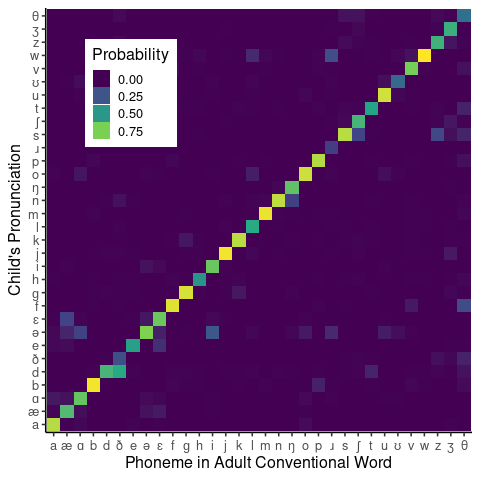

time: 506 ms (started: 2022-04-14 15:28:39 -07:00)


In [55]:
%%R
library('viridisLite')

p1 = ggplot() + geom_tile(
data = full_grid, aes(x=input_symbol, y=as.factor(output_symbol), fill=probability
)) +  scale_fill_viridis_c(na.value=0) + xlab('Phoneme in Adult Conventional Word'
) + ylab("Child's Pronunciation") + theme_classic(base_size=16) +
  guides(fill = guide_legend(title = "Probability")) + theme(legend.position = c(.2, .8))  

ggsave('../../output/figures/fst_prob_matrix.png', width=6, height=6)
print(p1)

In [20]:
# all schwas are deleted; all schwas are added


time: 241 µs (started: 2022-04-06 09:16:47 -07:00)


In [21]:
# Check the original input data to confirm that input and output schwa 

time: 18.8 ms (started: 2022-04-06 09:16:47 -07:00)


In [22]:
training_data = pd.read_table('/home/stephan/notebooks/child-directed-listening/external/2020/task1/data/train/chi_train.tsv', sep='\t', header=None)

time: 66.6 ms (started: 2022-04-06 09:16:47 -07:00)


In [23]:
training_data

,0,1
0,wɑʧ,w ɑ t ʃ
1,ðəs,ə s
2,lʊk,l ʊ ɡ
3,æt,æ
4,ðiz,d i s
...,...,...
179995,eə,ə
179996,slaəd,s l a ə
179997,dəŋ,d i
179998,dəŋ,n i ŋ ɡ


time: 6.62 ms (started: 2022-04-06 09:16:47 -07:00)


In [24]:
print(ord(training_data.iloc[1][0][1]))
print(ord(training_data.iloc[1][1][0])) # confirming that they are the same code point

601
601
time: 6.66 ms (started: 2022-04-06 09:16:47 -07:00)


In [25]:
# there should be more matches on schwa!

time: 8.22 ms (started: 2022-04-06 09:16:47 -07:00)


In [26]:
# [X] is this something bad that happens in the conditioning process? Nope, there are very few entries for schwa in chi-1.txt -- so it is already happening super early in the process
# [X] is there something in the input data
# [X] is there something weird in how I changed train_fst.sh: all I did was change the iterator so that it handles unigram stuff only. Doesn't look I changed anything substantive here 
# [X]  what if we were to switch the seed? Would that have an effect? Does this control which specific instances get tested -- tried switching this out
#     -- switching the seed has no effect
# [X] is there something odd about graphemes vs. phonemes? It looks like the graphemes (utf-8) and phonemes (in their own system) both have a schwa
# [X] confirm that this is up to date
# [ ] Something has to prune this -- so that it isn't 1400 states, but rather only around 400. This must happen in baumwelch training
# [ ] Is there a parameter I can mess with in baumwelchtrain -- nothing obvious

time: 8.9 ms (started: 2022-04-06 09:16:47 -07:00)
